In [0]:
data = spark.read.csv('/FileStore/tables/customer_booking.csv',inferSchema=True,header=True)

#show first 5 row

In [0]:
data.show(5)

+--------------+-------------+---------+-------------+--------------+-----------+----------+------+--------------+-------------------+--------------------+---------------------+---------------+----------------+
|num_passengers|sales_channel|trip_type|purchase_lead|length_of_stay|flight_hour|flight_day| route|booking_origin|wants_extra_baggage|wants_preferred_seat|wants_in_flight_meals|flight_duration|booking_complete|
+--------------+-------------+---------+-------------+--------------+-----------+----------+------+--------------+-------------------+--------------------+---------------------+---------------+----------------+
|             2|     Internet|RoundTrip|          262|            19|          7|       Sat|AKLDEL|   New Zealand|                  1|                   0|                    0|           5.52|               0|
|             1|     Internet|RoundTrip|          112|            20|          3|       Sat|AKLDEL|   New Zealand|                  0|                   0| 

# Print schema

In [0]:
data.printSchema()

root
 |-- num_passengers: integer (nullable = true)
 |-- sales_channel: string (nullable = true)
 |-- trip_type: string (nullable = true)
 |-- purchase_lead: integer (nullable = true)
 |-- length_of_stay: integer (nullable = true)
 |-- flight_hour: integer (nullable = true)
 |-- flight_day: string (nullable = true)
 |-- route: string (nullable = true)
 |-- booking_origin: string (nullable = true)
 |-- wants_extra_baggage: integer (nullable = true)
 |-- wants_preferred_seat: integer (nullable = true)
 |-- wants_in_flight_meals: integer (nullable = true)
 |-- flight_duration: double (nullable = true)
 |-- booking_complete: integer (nullable = true)



# Summary statistics

In [0]:
data.describe().show()

+-------+------------------+-------------+----------+-----------------+------------------+-----------------+----------+------+--------------+-------------------+--------------------+---------------------+------------------+-------------------+
|summary|    num_passengers|sales_channel| trip_type|    purchase_lead|    length_of_stay|      flight_hour|flight_day| route|booking_origin|wants_extra_baggage|wants_preferred_seat|wants_in_flight_meals|   flight_duration|   booking_complete|
+-------+------------------+-------------+----------+-----------------+------------------+-----------------+----------+------+--------------+-------------------+--------------------+---------------------+------------------+-------------------+
|  count|             50000|        50000|     50000|            50000|             50000|            50000|     50000| 50000|         50000|              50000|               50000|                50000|             50000|              50000|
|   mean|           1.59

# Count missing values per column

In [0]:
from pyspark.sql.functions import col, sum

data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns]).show()

+--------------+-------------+---------+-------------+--------------+-----------+----------+-----+--------------+-------------------+--------------------+---------------------+---------------+----------------+
|num_passengers|sales_channel|trip_type|purchase_lead|length_of_stay|flight_hour|flight_day|route|booking_origin|wants_extra_baggage|wants_preferred_seat|wants_in_flight_meals|flight_duration|booking_complete|
+--------------+-------------+---------+-------------+--------------+-----------+----------+-----+--------------+-------------------+--------------------+---------------------+---------------+----------------+
|             0|            0|        0|            0|             0|          0|         0|    0|             0|                  0|                   0|                    0|              0|               0|
+--------------+-------------+---------+-------------+--------------+-----------+----------+-----+--------------+-------------------+--------------------+------

#Data Visualization

#EDA

Num_passengers: Average passengers per booking

In [0]:
# Calculate the average number of passengers per booking
avg_passengers = data.agg({'num_passengers': 'mean'}).collect()[0][0]
print(f"Average Passengers per Booking: {avg_passengers}")

Average Passengers per Booking: 1.59124


Sales_channel: Distribution of bookings via Internet versus other channels

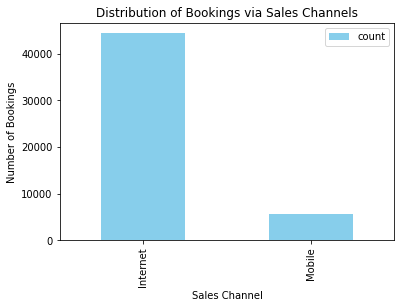

In [0]:
# Group by sales_channel and count occurrences
sales_channel_dist = data.groupBy("sales_channel").count().toPandas()

# Plot the distribution as a bar chart
sales_channel_dist.plot(kind='bar', x='sales_channel', y='count', color='skyblue')
plt.title('Distribution of Bookings via Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Bookings')
plt.show()

Trip_type: Ratio of round-trip to one-way bookings

Ratio of Round-Trip to One-Way Bookings: 127.89922480620154


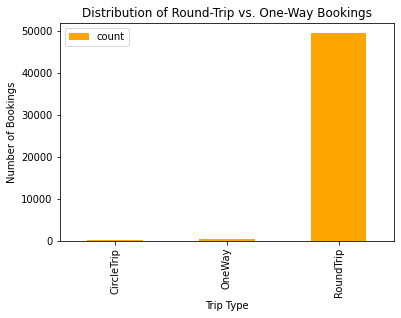

In [0]:
# Group by trip_type and count occurrences
trip_type_dist = data.groupBy("trip_type").count().toPandas()

# Calculate ratio of round-trip to one-way bookings
round_trip_count = trip_type_dist[trip_type_dist['trip_type'] == 'RoundTrip']['count'].values[0]
one_way_count = trip_type_dist[trip_type_dist['trip_type'] == 'OneWay']['count'].values[0]
trip_ratio = round_trip_count / one_way_count
print(f"Ratio of Round-Trip to One-Way Bookings: {trip_ratio}")

# Plot the distribution as a bar chart
trip_type_dist.plot(kind='bar', x='trip_type', y='count', color='orange')
plt.title('Distribution of Round-Trip vs. One-Way Bookings')
plt.xlabel('Trip Type')
plt.ylabel('Number of Bookings')
plt.show()


Flight_hour and Flight_day: Peak times and days for flight departures

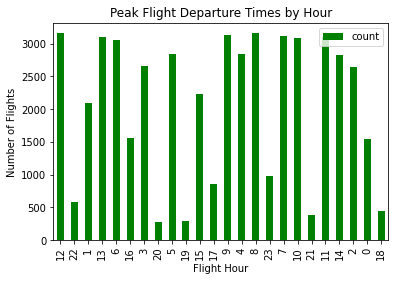

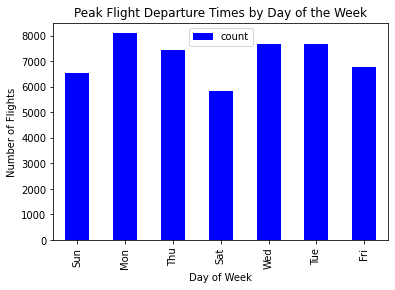

In [0]:
# Group by flight_hour and count the number of departures
flight_hour_dist = data.groupBy("flight_hour").count().toPandas()

# Plot the flight departure times by hour as a bar chart
flight_hour_dist.plot(kind='bar', x='flight_hour', y='count', color='green')
plt.title('Peak Flight Departure Times by Hour')
plt.xlabel('Flight Hour')
plt.ylabel('Number of Flights')
plt.show()

# Group by flight_day and count the number of departures
flight_day_dist = data.groupBy("flight_day").count().toPandas()

# Plot the flight departure times by day as a bar chart
flight_day_dist.plot(kind='bar', x='flight_day', y='count', color='blue')
plt.title('Peak Flight Departure Times by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.show()


Wants_extra_baggage, Wants_preferred_seat, Wants_in_flight_meals: Percentage of customers opting for extra services

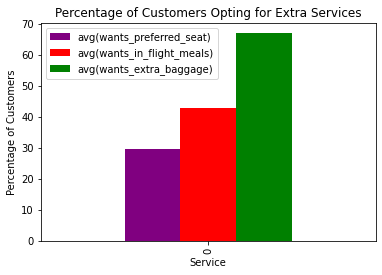

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-3489938081026817>:16
     14 plt.xlabel('Service')
     15 plt.ylabel('Percentage of Customers')
---> 16 plt.xticks(ticks=[0], labels=['Extra Baggage', 'Preferred Seat', 'In-Flight Meals'], rotation=0)
     17 plt.show()

File /databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py:1795, in xticks(ticks, labels, **kwargs)
   1793         l.update(kwargs)
   1794 else:
-> 1795     labels = ax.set_xticklabels(labels, **kwargs)
   1797 return locs, labels

File /databricks/python/lib/python3.9/site-packages/matplotlib/axes/_base.py:75, in _axis_method_wrapper.__set_name__.<locals>.wrapper(self, *args, **kwargs)
     74 def wrapper(self, *args, **kwargs):
---> 75     return get_method(self)(*args, **kwargs)

File /databricks/python/lib/python3.9/site-packages/matplotlib/axis.py:1798, in Axis._set_ticklabels(self, l

In [0]:
# Calculate the percentage of customers opting for extra services
extra_service_dist = data.agg({
    'wants_extra_baggage': 'mean',
    'wants_preferred_seat': 'mean',
    'wants_in_flight_meals': 'mean'
}).toPandas()

# Convert proportions to percentages
extra_service_dist = extra_service_dist * 100

# Plot the distribution as a bar chart
extra_service_dist.plot(kind='bar', color=['purple', 'red', 'green'])
plt.title('Percentage of Customers Opting for Extra Services')
plt.xlabel('Service')
plt.ylabel('Percentage of Customers')
plt.xticks(ticks=[0], labels=['Extra Baggage', 'Preferred Seat', 'In-Flight Meals'], rotation=0)
plt.show()

Customer Service Preferences: Bar Plot

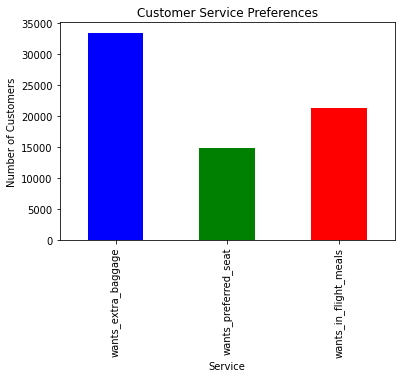

In [0]:
import matplotlib.pyplot as plt

# Convert relevant columns to Pandas DataFrame
service_data = data.select("wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals").toPandas()

# Bar plot for customer service preferences
service_data.sum().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Customer Service Preferences')
plt.xlabel('Service')
plt.ylabel('Number of Customers')
plt.show()

Flight Departure Patterns: Heatmap

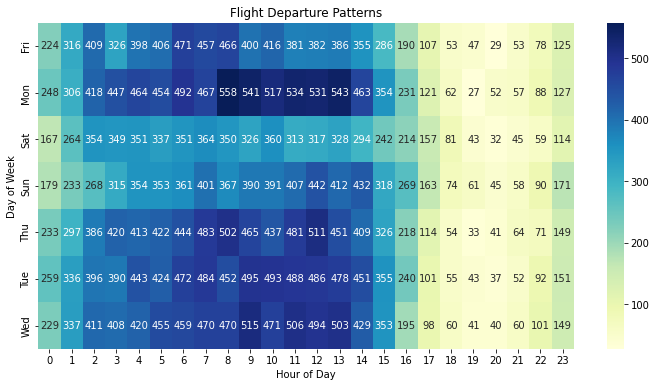

In [0]:
import seaborn as sns

# Group the data by flight_day and flight_hour and count occurrences
flight_data = data.groupBy("flight_day", "flight_hour").count().toPandas()

# Create pivot table for heatmap
heatmap_data = flight_data.pivot("flight_day", "flight_hour", "count")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Flight Departure Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

Sales Channel Usage: Pie Chart

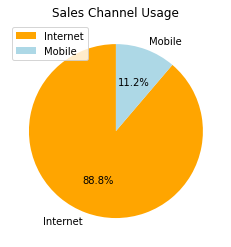

In [0]:
# Count the number of occurrences per sales channel
channel_data = data.groupBy("sales_channel").count().toPandas()

# Plot pie chart
channel_data.set_index("sales_channel", inplace=True)
channel_data.plot(kind='pie', y='count', autopct='%1.1f%%', startangle=90, colors=['orange', 'lightblue'])
plt.title('Sales Channel Usage')
plt.ylabel('')
plt.show()

Customer Segmentation (PCA Visualization)

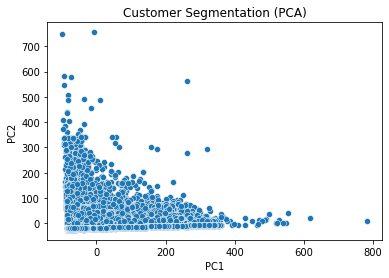

In [0]:
from sklearn.decomposition import PCA
import seaborn as sns

# Select numeric columns for clustering
cluster_data = data.select("num_passengers", "purchase_lead", "length_of_stay", "flight_duration").dropna().toPandas()

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(cluster_data)

# Convert to DataFrame for plotting
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

# Plot the PCA components
sns.scatterplot(x='PC1', y='PC2', data=reduced_df)
plt.title('Customer Segmentation (PCA)')
plt.show()